In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from model_plot import model_plot
from norms import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
model_dir = 'data_birth_precise/'

In [4]:
model_0 = model_from_file(model_dir + 'model_0.csv')

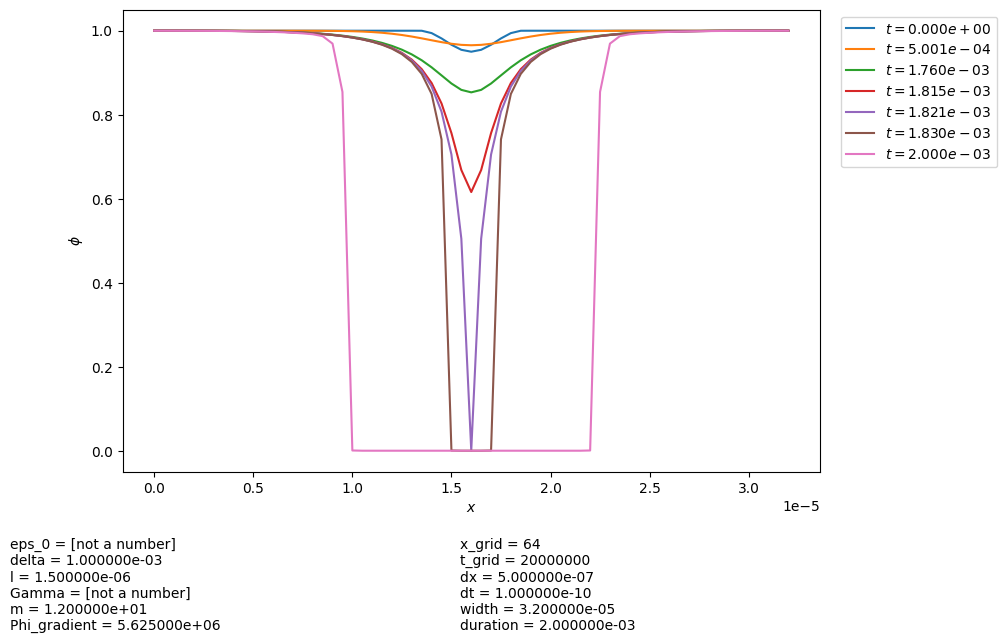

In [5]:
ts = [0, 5e-4, 1.76e-3, 1.815e-3, 1.821e-3, 1.83e-3, 2e-3]
model_plot(model_0, ts, figsize=(9, 6))

In [6]:
def load_models(file_prefix, n):
    models = []
    for i in range(n):
        model = model_from_file(model_dir + file_prefix + '_{}.csv'.format(i + 1))
        models.append(model)
    return models

In [7]:
def process_models(models, model_0, metric):
    boost = [
        model_0._t_iterations.sum() / model._t_iterations.sum() for model in models
    ]
    norms = [metric(model_0, model) for model in models]
    return boost, norms

In [8]:
def metric_simple(model_first, model_second):
    return norm_uniform((model_first.df_phi - model_second.df_phi).to_numpy())

def metric_adaptation(model_first, model_second):
    return norm_uniform(phi_difference(model_first, model_second)[0])

In [9]:
models = load_models('model', 2)
boost, norms = process_models(models, model_0, metric_simple)

In [10]:
boost, norms

([np.float64(1.9999998999833672), np.float64(3.9999993999002634)],
 [np.float64(0.007926765000000002), np.float64(0.02013003400000002)])

In [11]:
models_aphi = load_models('model_aphi', 5)
boost_aphi, norms_aphi = process_models(models_aphi, model_0, metric_adaptation)

In [12]:
boost_aphi, norms_aphi

([np.float64(2.3184223154666466),
  np.float64(4.0876398844231945),
  np.float64(8.076109397793562),
  np.float64(15.5911089383885),
  np.float64(32.03321916930451)],
 [np.float64(0.004509272000000009),
  np.float64(0.017176944),
  np.float64(0.123713299375),
  np.float64(0.31812365937500003),
  np.float64(0.399184104375)])

In [13]:
models_aenergy = load_models('model_aenergy', 3)
boost_aenergy, norms_aenergy = process_models(models_aenergy, model_0, metric_adaptation)

In [14]:
boost_aenergy, norms_aenergy

([np.float64(2.188835192693328),
  np.float64(3.965133735478008),
  np.float64(8.413997583097842)],
 [np.float64(0.006221695999999999),
  np.float64(0.033034705),
  np.float64(0.381769135375)])

In [15]:
models_astability = load_models('model_astability', 4)
boost_astability, norms_astability = process_models(models_astability, model_0, metric_adaptation)

In [16]:
boost_astability, norms_astability

([np.float64(1.8246626299022357),
  np.float64(4.817464334593872),
  np.float64(8.359795652601061),
  np.float64(15.921970162040964)],
 [np.float64(0.0025439000000000156),
  np.float64(0.014598768000000012),
  np.float64(0.04510243),
  np.float64(0.405616721139)])

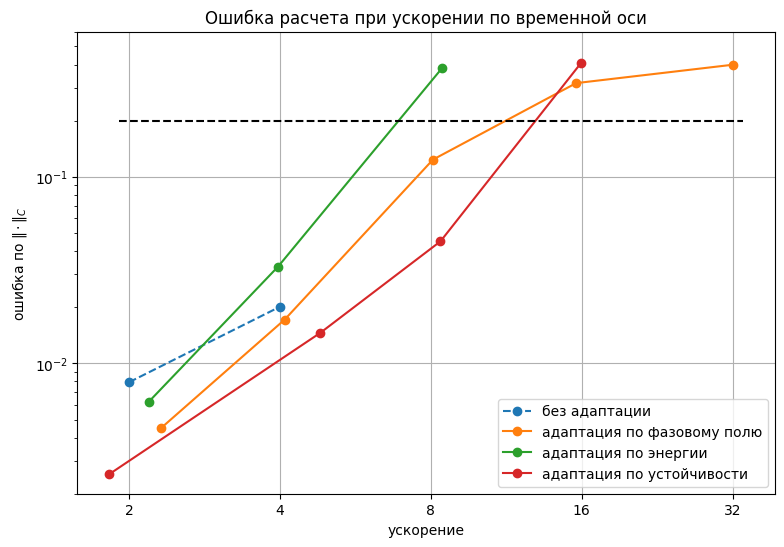

In [19]:
plt.figure(figsize=(9, 6))  # figsize=(7.5, 4.5), dpi=300)
plt.title('Ошибка расчета при ускорении по временной оси')
plt.xlabel('ускорение')
plt.ylabel(r'ошибка по $\| \cdot \|_C$')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(2**np.arange(6), 2**np.arange(6))
plt.xticks([], minor=True)
plt.ylim([2e-3, 6e-1])
plt.plot(boost, norms, '--o')
plt.plot(boost_aphi, norms_aphi, '-o')
plt.plot(boost_aenergy, norms_aenergy, '-o')
plt.plot(boost_astability, norms_astability, '-o')
plt.plot([2 / 1.05, 32 * 1.05], 2 * [2e-1], '--', color='black')
plt.legend([
    'без адаптации',
    'адаптация по фазовому полю',
    'адаптация по энергии',
    'адаптация по устойчивости',
])
plt.show()

### Выставляем меньшее $\tau_{\max}$, чтобы ограничение включилось

In [20]:
print(models_aphi[4]._t_iterations[1:].min())
print(models_aenergy[2]._t_iterations[1:].min())
print(models_astability[3]._t_iterations[1:].min())

1
1
2


In [21]:
print(models_aphi[4]._dt_level.max())
print(models_aenergy[2]._dt_level.max())

13
13


In [22]:
models_aphi_lim = load_models('model_aphi_lim', 6)
boost_aphi_lim, norms_aphi_lim = process_models(models_aphi_lim, model_0, metric_adaptation)

In [23]:
boost_aphi_lim, norms_aphi_lim

([np.float64(2.3184223154666466),
  np.float64(4.0876398844231945),
  np.float64(8.052492056908376),
  np.float64(15.965127159443108),
  np.float64(32.15214514606738),
  np.float64(63.03505332076625)],
 [np.float64(0.004509272000000009),
  np.float64(0.017176944),
  np.float64(0.04897736),
  np.float64(0.06304294900000001),
  np.float64(0.071096027),
  np.float64(0.19186043705699998)])

In [24]:
models_aenergy_lim = load_models('model_aenergy_lim', 6)
boost_aenergy_lim, norms_aenergy_lim = process_models(models_aenergy_lim, model_0, metric_adaptation)

In [25]:
boost_aenergy_lim, norms_aenergy_lim

([np.float64(2.188835192693328),
  np.float64(3.9508193288061264),
  np.float64(8.141344636485481),
  np.float64(16.13833581232512),
  np.float64(32.455598223734185),
  np.float64(61.86783141923667)],
 [np.float64(0.006221695999999999),
  np.float64(0.028595830000000017),
  np.float64(0.05553192800000001),
  np.float64(0.067107463),
  np.float64(0.074719862),
  np.float64(0.191271569375)])

In [26]:
models_astability_lim = load_models('model_astability_lim', 6)
boost_astability_lim, norms_astability_lim = process_models(models_astability_lim, model_0, metric_adaptation)

In [27]:
boost_astability_lim, norms_astability_lim

([np.float64(1.8246626299022357),
  np.float64(4.817464334593872),
  np.float64(8.359795652601061),
  np.float64(16.61934048471722),
  np.float64(32.164039767801334),
  np.float64(58.70203759316829)],
 [np.float64(0.0025439000000000156),
  np.float64(0.014598768000000012),
  np.float64(0.04510243),
  np.float64(0.155777113139),
  np.float64(0.169714652139),
  np.float64(0.19769266837500002)])

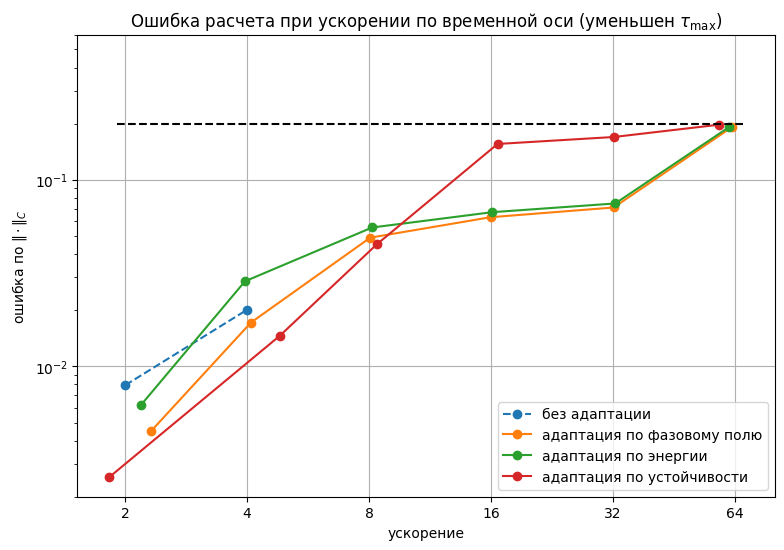

In [28]:
plt.figure(figsize=(9, 6))  # figsize=(7.5, 4.5), dpi=300)
plt.title(r'Ошибка расчета при ускорении по временной оси (уменьшен $\tau_{\max}$)')
plt.xlabel('ускорение')
plt.ylabel(r'ошибка по $\| \cdot \|_C$')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(2**np.arange(7), 2**np.arange(7))
plt.xticks([], minor=True)
plt.ylim([2e-3, 6e-1])
plt.plot(boost, norms, '--o')
plt.plot(boost_aphi_lim, norms_aphi_lim, '-o')
plt.plot(boost_aenergy_lim, norms_aenergy_lim, '-o')
plt.plot(boost_astability_lim, norms_astability_lim, '-o')
plt.plot([2 / 1.05, 64 * 1.05], 2 * [2e-1], '--', color='black')
plt.legend([
    'без адаптации',
    'адаптация по фазовому полю',
    'адаптация по энергии',
    'адаптация по устойчивости',
])
plt.show()